# Final Project

* The code and explanations provided in this notebook will be helpful to develop the course final project. 

* The first section includes various functions that are used in the main function of the genetic algorithm (section 2)

* Section 3 applies the GA function using one and two generations of individuals

* Section 4 includes the answers of the solution of the final project

### 1) Functions implemented in the genetic algorithm (GA)

### Number of cities

In [1]:
n = 6

n =  6


### Matrix of distance between cities (randomly generated)

In [2]:
function d = distanceMatrixCities(n)

    d = randi(100,n,n);

    ## Fill diagonal with zeros
    i = 1;
    
    while(i<=n)
        d(i,i) = 0;
        i++;
    end
    
end

In [3]:
d = distanceMatrixCities(n)

d =

    0   90   46   60   82   71
   66    0   64   48   12   86
   36   91    0   45   30   31
   81   41   14    0   55   99
   82   27   17   72    0   59
   59   73   83   48   93    0



## a) Initial population

### Total population

In [4]:
totalPop = perms([1:n]); #This built-in function allows to generate the total population of individuals

In [5]:
totalPop(1:10,:) #First 10 individuals of the total population

ans =

   6   5   4   3   2   1
   6   5   4   3   1   2
   6   5   4   2   3   1
   6   5   4   2   1   3
   6   5   4   1   3   2
   6   5   4   1   2   3
   6   5   3   4   2   1
   6   5   3   4   1   2
   6   5   3   2   4   1
   6   5   3   2   1   4



In [6]:
size(totalPop)(1) #Size of the total population

ans =  720


### Size of the initial population ("generation 0")

In [7]:
sizeGeneration0 = 20 

sizeGeneration0 =  20


### Select individuals randomly from the total population 

In [8]:
function subPop = createGeneration(totalPop,sizeGen)
    
    # This function returns a list with one element.
    # The element contains a matrix with the sequence of cities associated to each individual of the generation
    
    subPop = totalPop(randi(size(totalPop)(1),sizeGen,1),:);

end

In [9]:
# Creation of the generation 0

In [10]:
generation0 = createGeneration(totalPop = totalPop,sizeGen = sizeGeneration0)

generation0 =

   4   1   6   5   2   3
   4   5   6   3   2   1
   5   1   2   4   6   3
   6   3   1   5   4   2
   2   6   5   1   3   4
   4   6   5   2   1   3
   1   3   2   5   6   4
   6   4   3   5   2   1
   3   2   5   1   6   4
   3   2   5   4   6   1
   4   6   2   1   5   3
   2   4   5   6   1   3
   6   1   4   3   2   5
   6   2   1   5   3   4
   1   6   4   2   5   3
   2   6   1   4   5   3
   5   1   4   3   6   2
   5   3   6   4   1   2
   3   2   4   5   1   6
   4   6   1   3   5   2



## b) Fitness calculation

### Total travel distance for each possible sequence of cities

In [11]:
function individuals = distanceCalculation(pop,d)
    
    # This function returns a list with two elements.
    # The first 1 element contains the list that is received as input.
    # The second element contains a vector withthe total distance between cities

    
    daccs = zeros([size(pop)(1),size(pop)(2)+1]);

        for i = 1:(size(pop)(1))
            dacc = 0;

            for j = 1:(size(pop)(2)-1)
                dacc += d(pop(i,j),pop(i,j+1));
            end

            daccs(i,:) = [pop(i,:),dacc];
            
        end
    
    individuals{1} = pop;
    individuals{2} = daccs(:,size(daccs)(2));

end

In [12]:
generation0 = distanceCalculation(pop = generation0, d = d)

generation0 =
{
  [1,1] =

     4   1   6   5   2   3
     4   5   6   3   2   1
     5   1   2   4   6   3
     6   3   1   5   4   2
     2   6   5   1   3   4
     4   6   5   2   1   3
     1   3   2   5   6   4
     6   4   3   5   2   1
     3   2   5   1   6   4
     3   2   5   4   6   1
     4   6   2   1   5   3
     2   4   5   6   1   3
     6   1   4   3   2   5
     6   2   1   5   3   4
     1   6   4   2   5   3
     2   6   1   4   5   3
     5   1   4   3   6   2
     5   3   6   4   1   2
     3   2   4   5   1   6
     4   6   1   3   5   2

  [1,2] =

     336
     354
     402
     314
     352
     331
     256
     185
     304
     333
     337
     267
     236
     283
     189
     277
     260
     267
     347
     261

}



### Computation of the fitness of each individual (1/distance)

In [13]:
function individuals = fitness(individuals)
    
    # This function returns a list with three elements.
    # The first two elements corresponds are the same elements of the list received as an input.
    # The third element of the list includes a vector with the fitness of each individual. 

    individuals{3} = individuals{2};

    for i=1:size(individuals{1})(1)

        individuals{3}(i,1) = 1/individuals{2}(i);

    end 

end

In [14]:
generation0 = fitness(generation0)

generation0 =
{
  [1,1] =

     4   1   6   5   2   3
     4   5   6   3   2   1
     5   1   2   4   6   3
     6   3   1   5   4   2
     2   6   5   1   3   4
     4   6   5   2   1   3
     1   3   2   5   6   4
     6   4   3   5   2   1
     3   2   5   1   6   4
     3   2   5   4   6   1
     4   6   2   1   5   3
     2   4   5   6   1   3
     6   1   4   3   2   5
     6   2   1   5   3   4
     1   6   4   2   5   3
     2   6   1   4   5   3
     5   1   4   3   6   2
     5   3   6   4   1   2
     3   2   4   5   1   6
     4   6   1   3   5   2

  [1,2] =

     336
     354
     402
     314
     352
     331
     256
     185
     304
     333
     337
     267
     236
     283
     189
     277
     260
     267
     347
     261

  [1,3] =

     0.0029762
     0.0028249
     0.0024876
     0.0031847
     0.0028409
     0.0030211
     0.0039062
     0.0054054
     0.0032895
     0.0030030
     0.0029674
     0.0037453
     0.0042373
     0.0035336
     0.0052910
    

## c) Choice of parents to create the next generation of individuals

In [15]:
function [individuals,parents] = chooseParents(individuals)
    
    # This function returns a list with four elements.
    # The first three elements corresponds are the same elements of the list received as an input.
    #The fourth element contains a vector with 0's and 1's. Individuals selected as parents receives the value 1.

    individuals{4} = individuals{3};

    individualsCopy = individuals;

    #probParent = individuals{3}/sum(individuals{3})

    #First best-fitted individual

    [maxVal1,maxIndex1] = max(individuals{3});

    #Second best-fitted individual
    individualsCopy{3}(maxIndex1) = -1*individualsCopy{3}(maxIndex1);
    [maxVal2,maxIndex2] = max(individualsCopy{3});

    #Create a column with binary variables that takes the value 1 if the individual is parent or zero, otherwise. 
    individuals{4}=zeros(size(individuals{1})(1),1);

    individuals{4}(maxIndex1) = 1;
    individuals{4}(maxIndex2) = 1;

end

In [16]:
chooseParents(generation0)

ans =
{
  [1,1] =

     4   1   6   5   2   3
     4   5   6   3   2   1
     5   1   2   4   6   3
     6   3   1   5   4   2
     2   6   5   1   3   4
     4   6   5   2   1   3
     1   3   2   5   6   4
     6   4   3   5   2   1
     3   2   5   1   6   4
     3   2   5   4   6   1
     4   6   2   1   5   3
     2   4   5   6   1   3
     6   1   4   3   2   5
     6   2   1   5   3   4
     1   6   4   2   5   3
     2   6   1   4   5   3
     5   1   4   3   6   2
     5   3   6   4   1   2
     3   2   4   5   1   6
     4   6   1   3   5   2

  [1,2] =

     336
     354
     402
     314
     352
     331
     256
     185
     304
     333
     337
     267
     236
     283
     189
     277
     260
     267
     347
     261

  [1,3] =

     0.0029762
     0.0028249
     0.0024876
     0.0031847
     0.0028409
     0.0030211
     0.0039062
     0.0054054
     0.0032895
     0.0030030
     0.0029674
     0.0037453
     0.0042373
     0.0035336
     0.0052910
     0.00361

In [17]:
function parents = createParents(individuals)

# This function returns a list with three elements that refer to the individuals selected as parents.
# (element 1: sequence of cities, element 2: total distance, element 3: fitness)

individuals = chooseParents(individuals);

parents = {:};

count = 1;

for i = 1:size(individuals{4})(1)

    if individuals{4}(i) == 1

    parents{1}(count,:) = individuals{1}(i,:);
    parents{2}(count,:) = individuals{2}(i,:);
    parents{3}(count,:) = individuals{3}(i,:);
    
    count++;

    end

end


end

In [18]:
parentsG0 = createParents(generation0)

parentsG0 =
{
  [1,1] =

     6   4   3   5   2   1
     1   6   4   2   5   3

  [1,2] =

     185
     189

  [1,3] =

     0.0054054
     0.0052910

}



## d) Crossover

### Check if a gene (city) exist in a chromosome (sequence of cities)

In [19]:
function geneExist = containGene(child,gene)
    
    # This function is used by the function crossover()
    
    geneExist = false;

    for i=1:length(child)

        if child(i) == gene

            geneExist = true;

        end

    end

end

### Crossover between the two parents

In [20]:
function child = crossover(parents)
    
    #This function received a list with the parents' characteristics and performs the crossover operation to return a child

    nParents = size(parents{1})(1);
    chromosomeSize = size(parents{1})(2);

    %Select a random crossover point
    indexCO = randi([2,chromosomeSize],1,1);

    %Select the parent (parentChromosome1) that is used to start the crossover
    parentCO = randi(nParents,1,1);
    chromosomeParent1 = parents{1}(parentCO,:);
    chromosomeParent2 = parents{1}(1,:);

    if parentCO == 1
        chromosomeParent2 = parents{1}(2,:);
    end

    child = chromosomeParent1;

    #Genes from parent 1
    for i=1:length(child)

        if i < indexCO
            child(i) = 0;
        end

    end

    #Genes from parent 2
    genePosition = 1;
    for i=1:(indexCO-1)

        implant = false;

        while implant == false 
            geneExist = containGene(child,chromosomeParent2(genePosition));

            if geneExist == true
                genePosition++;
                implant = false;

            else
                child(i) = chromosomeParent2(genePosition);
                implant = true;
                genePosition++;
            end

        end

    end
    
end

In [21]:
childG0 = crossover(parentsG0)

childG0 =

   6   4   5   2   1   3



## e) Mutation

In [22]:
function child = mutation(child, pm)
    
    #This function received a child and then performs the mutation operation on that child
    
    childCopy = child;
    chromosomeSize = length(child);

    %Select two random mutation points
    indexM1 = randi([1,chromosomeSize],1,1);
    indexM2 = randi([1,chromosomeSize],1,1);
    
    %Mutation is done with a 'pm'% chance
    mutationProbThreshold = rand(1);
    
    if mutationProbThreshold < pm
    
        childCopy(indexM1) = child(indexM2);
        childCopy(indexM2) = child(indexM1);
        
    end
    
    child = childCopy;

end

In [23]:
childG0 #With no mutation
childG0 = mutation(childG0, pm = 0.5) # Child with mutation (setting a 50% probability of mutation)

childG0 =

   6   4   5   2   1   3

childG0 =

   6   4   5   3   1   2



## f) Next Generation

### Size of the next generations 

In [24]:
sizeNextGenerations = 1*size(generation0{1})(1) #Define the same size of the initial generation (generation 0)

sizeNextGenerations =  20


### f) Check if the child exists in a generation

In [25]:
function childExist = containChild(child,children)
    
    # This function prevents to have two identical childs in a generation 
    
    childExist = false;
    
    for i=1:size(children)(1)
    
        counterEqualGenes = 0;
        
        for j= 1:length(children(i,:))
        
            if children(i,:)(j) == child(j)
                counterEqualGenes++;
            end
     
        end
        
        if counterEqualGenes == length(child)
            childExist = true;
        end


    end

end

# 2) Genetic algorithm 

In [26]:
function generations = GA(initialGeneration, nGenerations,sizeNextGenerations,d,pm)
    
    #This function uses almost all the previous functions and it requires the following inputs:
    
    # initialGeneration: Matrix with the sequence of cities associated to the individuals of the initial generation (generation 0)
    # nGenerations: Number of the generations. if nGenerations is equal to 1, this function returns a list describing generation 0
    # sizeGeneration: number of individuals in each of the next generations
    # d: matrix of distance between cities
    # pm: probability of mutation
    
    #It returns a list ("generations"). The first element contains a list the characteristics of the individuals of generation 0
    # The next elements of the list contains a list with the characteristics of one of the next generations. 
    # The elements of the list of each generation contains the following:
    
    #1: Matrix of individuals of the generation 
    #2: Vector with total distance of each individual
    #3: Vector with fitness of each individual (1/d)
    #4: Vector with the sequence of cities associated to the best individual of the generation
    #5: Scalar with total distance of the best individual
    #6: Computation time of the functions executed to generate the list of each generation (in seconds)
    
    generations = {:};
    
    currentGeneration{1} = initialGeneration;
    
    #This process is iteratively repeated for each generation
    
    for i=0:(nGenerations)      
        
        t=cputime;
                
        if i == 0
            
            #Information about the initial generation
            currentGeneration  = distanceCalculation(currentGeneration{1},d);
            currentGeneration = fitness(currentGeneration);
            [maxVal,maxIndex] = max(currentGeneration{3});
            currentGeneration(4) = currentGeneration{1}(maxIndex,:); #Best individual
            currentGeneration(5) = currentGeneration{2}(maxIndex); #Total distance of Best individual
            currentGeneration(6) = cputime-t;
            
        end
               
        if i > 0        

            parents = createParents(previousGeneration);
            
            #Include parents in the next generation
            currentGeneration{1}(1,:) = parents{1}(1,:);
            currentGeneration{1}(2,:) = parents{1}(2,:);
            
            #Create child from parents
            child = crossover(parents);
            child = mutation(child,pm);
            
            #Include first child in the next generation
            currentGeneration{1}(3,:) = child;

            #This loop is repeated until reaching the number of individuals in a generation
            
            for j=4:sizeNextGenerations

                 newChild = mutation(crossover(parents),pm);

                 #Verify whether a new child is different to the existing children in the generation
                 while(containChild(child = newChild, children = currentGeneration{1}) == true)

                     newChild = mutation(crossover(parents),pm);

                 end

                 currentGeneration{1}(j,:) = newChild;
                 
                #Information about the new generation
                currentGeneration  = distanceCalculation(currentGeneration{1},d);
                currentGeneration = fitness(currentGeneration);
                [maxVal,maxIndex] = max(currentGeneration{3});
                currentGeneration(4) = currentGeneration{1}(maxIndex,:); #Best individual
                currentGeneration(5) = currentGeneration{2}(maxIndex); #Total distance of Best individual
                currentGeneration(6) = cputime-t;

            end
        
        end
        
        generations{i+1} = currentGeneration;
            
        previousGeneration = currentGeneration;
            
        currentGeneration = {};
        
    end

end

# 3) Application of the genetic algorithm using different numbers of generations

## a) Generation 0

In [27]:
generation0 = createGeneration(totalPop = totalPop,sizeGen = sizeGeneration0);

## b) Genetic algorithm using one generation (first element of the list is generation 0, second element is generation 1)

In [28]:
generations01 = GA(initialGeneration = generation0, nGenerations = 1, sizeNextGenerations = 10, d = d, pm = 0.4)

generations01 =
{
  [1,1] =
  {
    [1,1] =

       3   5   2   6   4   1
       5   6   1   2   3   4
       1   6   4   3   5   2
       4   2   3   5   6   1
       1   3   6   2   4   5
       6   2   4   3   5   1
       4   1   6   2   3   5
       3   1   6   4   5   2
       3   4   5   2   1   6
       3   4   6   2   1   5
       6   1   5   2   4   3
       5   1   6   2   4   3
       6   3   1   2   5   4
       4   3   6   5   2   1
       6   2   5   3   1   4
       3   6   1   5   4   2
       6   2   3   5   1   4
       2   4   5   6   3   1
       2   1   5   6   4   3
       5   4   6   1   3   2

    [1,2] =

       272
       317
       190
       253
       253
       247
       319
       237
       264
       365
       230
       288
       293
       231
       198
       285
       309
       281
       269
       367

    [1,3] =

       0.0036765
       0.0031546
       0.0052632
       0.0039526
       0.0039526
       0.0040486
       0.0031348
       0

## c) Genetic algorithm using two generations

In [29]:
generations012 = GA(initialGeneration = generation0, nGenerations = 2, sizeNextGenerations = 10, d = d, pm = 0.2)

generations012 =
{
  [1,1] =
  {
    [1,1] =

       3   5   2   6   4   1
       5   6   1   2   3   4
       1   6   4   3   5   2
       4   2   3   5   6   1
       1   3   6   2   4   5
       6   2   4   3   5   1
       4   1   6   2   3   5
       3   1   6   4   5   2
       3   4   5   2   1   6
       3   4   6   2   1   5
       6   1   5   2   4   3
       5   1   6   2   4   3
       6   3   1   2   5   4
       4   3   6   5   2   1
       6   2   5   3   1   4
       3   6   1   5   4   2
       6   2   3   5   1   4
       2   4   5   6   3   1
       2   1   5   6   4   3
       5   4   6   1   3   2

    [1,2] =

       272
       317
       190
       253
       253
       247
       319
       237
       264
       365
       230
       288
       293
       231
       198
       285
       309
       281
       269
       367

    [1,3] =

       0.0036765
       0.0031546
       0.0052632
       0.0039526
       0.0039526
       0.0040486
       0.0031348
       

# 4) Solution

## Problema 1: Analice cómo evoluciona el tiempo computacional al resolver el problema del vendedor viajero por medio del método de fuerza bruta y el algoritmo genético cuando el número de ciudades varía entre 2 y 8. Para ello, primero genere gráficos con Octave que muestren las relaciones entre las variables de interés y luego discuta sobre estos gráficos en el informe en Word.

### Generation of distance matrices

In [30]:
function distanceMatrices = distanceMatricesGeneration(minNCities,maxNCities)

    count = 1;
    
    distanceMatrices = {};
        
    for i = minNCities:maxNCities;
        distanceMatrices{count} = distanceMatrixCities(i);
        count++;

    end

end 

In [31]:
dMatricesCities18 = distanceMatricesGeneration(minNCities = 1,maxNCities = 8)

dMatricesCities18 =
{
  [1,1] = 0
  [1,2] =

      0   10
     92    0

  [1,3] =

      0    1   82
     39    0   60
     27   57    0

  [1,4] =

      0   80   54   20
     17    0   16   19
     25   22    0   22
     24   81   58    0

  [1,5] =

      0   38    7   11   50
     74    0   18   39   69
     55   75    0   74    9
      5   18    4    0   47
     33   84   92   26    0

  [1,6] =

      0   63   72   61   47   77
     15    0   93   60   72   93
     50   90    0   26    5   37
     69   63    1    0   18   87
     86    6   62   14    0   44
     56   46   34   61   95    0

  [1,7] =

       0    63    23   100    39    52    32
      30     0    17    64    92    38    70
      84    83     0    48    89    61    35
      31    32     3     0    37    10    65
      69    41    30    90     0    61    44
      27     8    72     7    19     0    90
      31    58    82    71     6    25     0

  [1,8] =

       0     1    40    97    53     2    11     3
      3

### Brute force algorithm

In [32]:
function daccs = distanceCalculationBF(cities,d)

    daccs = zeros([size(cities)(1),size(cities)(2)+1]);

    for i = 1:(size(cities)(1))
        dacc = 0;
        
        for j = 1:(size(cities)(2)-1)
            dacc += d(cities(i,j),cities(i,j+1));
        end
        
        daccs(i,:) = [cities(i,:),dacc];
    
    end
end

In [33]:
function minS = minimumTotalDistanceBF(daccs,nCities)

    minD = min(daccs(:,nCities+1));
    minS = 1;

    for i = 1:size(daccs)(1)
        if(daccs(i,size(daccs)(2))==minD)
            minS = i;
        end
    end

end



In [34]:
function [nCities,minSeq,minDist,cpuTime] = BF(nCities, dMatrices)

    d = dMatrices{nCities};
    
    t=cputime;

    p = perms([1:nCities]);

    daccs = distanceCalculationBF(cities = p, d = d);

    minS = minimumTotalDistanceBF(daccs,nCities = nCities);

    minSeq = daccs(minS,1:(size(daccs)(2)-1));
    minDist = daccs(minS,size(daccs)(2));
    cpuTime = cputime-t;


end

In [35]:
function [CPUTimeAndCitiesBF] = plotNCitiesCPUTimeBF(minNCities,maxNCities, dMatrices)

    CPUTimeAndCities = zeros(maxNCities-minNCities+1,2);

    count = 1;

    for i = minNCities:maxNCities;

        [nCities,minSeq,minDist,cpuTime] = BF(nCities = i,dMatrices = dMatrices);
        CPUTimeAndCitiesBF(count,1) = nCities;
        CPUTimeAndCitiesBF(count,2) = cpuTime;
        
        count++;

    end

end

In [36]:
CPUTimeAndCitiesBF28 = plotNCitiesCPUTimeBF(minNCities=2,maxNCities=8, dMatrices = dMatricesCities18);

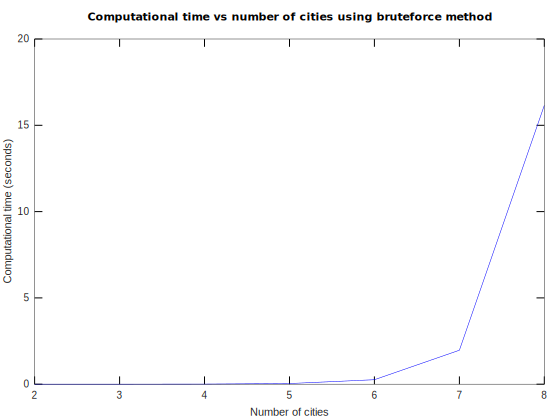

In [37]:
plot([CPUTimeAndCitiesBF28(:,1)], [CPUTimeAndCitiesBF28(:,2)], 'b');
title ("Computational time vs number of cities using bruteforce method");
xlabel ("Number of cities");
ylabel ("Computational time (seconds)");

### Genetic algorithm

In [38]:
function CPUTimeAndCitiesGA = plotNCitiesCPUTimeGA(minNCities,maxNCities, dMatrices)

    CPUTimeAndCities = zeros(maxNCities-minNCities+1,2);

    count = 1;
    
    sizeGeneration0 = 5;
    nGenerations = 3;
    sizeNextGenerations = 10;
    pm = 0.8;

    for i = minNCities:maxNCities;
        
        totalPop = perms([1:i]); #This built-in function allows to generate the total population of individuals
        generation0 = createGeneration(totalPop = totalPop,sizeGen = sizeGeneration0);
        
        cputimeGA = GA(initialGeneration = generation0, nGenerations = nGenerations , sizeNextGenerations = sizeNextGenerations, d = dMatrices{i}, pm = pm){nGenerations+1}{6};
        
        CPUTimeAndCitiesGA(count,1) = i;
        CPUTimeAndCitiesGA(count,2) = cputimeGA;
        count++;

    end

end

* The GA will not converge if the number of cities is low and the size of the next generations is high. 
* In fact, the condition to add a child to the next generation is that the child is different to the existing children
* If the number of cities is low, a child will be likely equal to the existing children and the mutation method will keep looping forever
* To avoid this problem, we will only calculate the computional time in cases with more than 4 cities. 

In [39]:
CPUTimeAndCitiesGA28 = plotNCitiesCPUTimeGA(minNCities=5,maxNCities=8, dMatrices = dMatricesCities18)

CPUTimeAndCitiesGA28 =

   5.000000   0.088235
   6.000000   0.062334
   7.000000   0.053063
   8.000000   0.055001



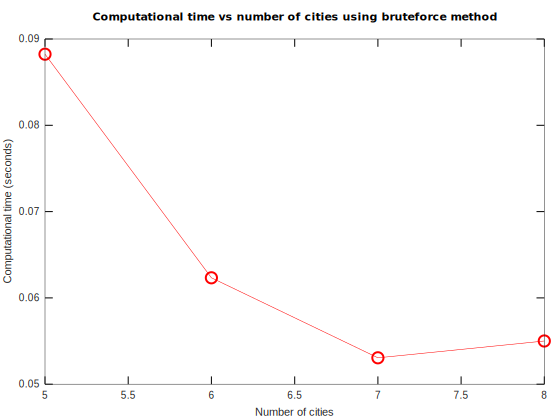

In [40]:
plot([CPUTimeAndCitiesGA28(:,1)], [CPUTimeAndCitiesGA28(:,2)], 'o-r');
title ("Computational time vs number of cities using bruteforce method");
xlabel ("Number of cities");
ylabel ("Computational time (seconds)");

* The computational time using GA remains almost constant regardless the number of cities. Since some routines of the GA involves probabilities, each iteration will generate a different plot. Any difference between the points is attributed to random error rather than a systematic trend where as higher is the number of cities, lower or higher is the computational time

## Combined plot

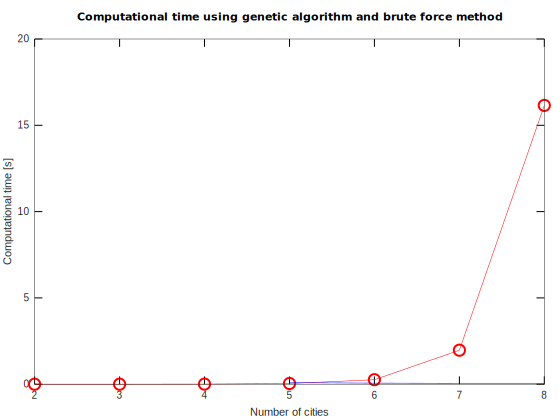

In [41]:
plot([CPUTimeAndCitiesBF28(:,1)], [CPUTimeAndCitiesBF28(:,2)], 'o-r');
title ("Computational time using genetic algorithm and brute force method");
xlabel ("Number of cities");
ylabel ("Computational time [s]");
hold on;
plot([CPUTimeAndCitiesGA28(:,1)], [CPUTimeAndCitiesGA28(:,2)], 'b');
#axis([min(CPUTimeAndGenerations18(:,1)) max(CPUTimeAndGenerations18(:,1)) 0 2])
hold off;

* Here it is clear that the computational time grows at a non-polinynomial pace when using brute force method 

## Problema 2: Para un caso de 6 ciudades, analice cómo afecta la probabilidad de mutación, el tamaño de la población inicial y el tamaño de las siguientes generaciones en la diferencia entre el valor óptimo real (obtenido por fuerza fruta) y el valor óptimo aproximado obtenido con el algoritmo genético. Para ello, primero genere gráficos en Octave que muestren las relaciones entre las variables de interés y luego discuta sobre estas relaciones en el informe. Par responder a esta pregunta debe utilizar la siguiente matriz de distancias entre las 6 ciudades:


$$
\left[\begin{array}{cccccc} 
			0     & 34    & 3     & 63    & 38    & 29 \\
			12    & 0     & 71    & 44    & 16    & 95 \\
			63    & 85    & 0     & 55    & 88    & 73 \\
			63    & 16    & 36    & 0     & 53    & 19 \\
			75    & 35    & 34    & 4     & 0     & 45 \\
			57    & 22    & 59    & 100   & 93    & 0
\end{array}\right]
$$ 

## a) Definition of initial parameters

### - Distance matrix

In [42]:
d = [0 34 3 63 38 29; 12 0 71 44 16 95; 63 85 0 55 88 73; 63 16 36 0 53 19; 75 35 34 4 0 45; 57 22 59 100 93 0]

d =

     0    34     3    63    38    29
    12     0    71    44    16    95
    63    85     0    55    88    73
    63    16    36     0    53    19
    75    35    34     4     0    45
    57    22    59   100    93     0



### - Optimal distance using bruteforce method

#### Function that computes the minimum distance using the brute force method, which is the true optimal value

In [43]:
function [opt,t]=OptimalDistanceCalculation(pop,d)

    t=cputime;

    opt = min(distanceCalculation(pop,d){2});

    t = cputime-t;

end

In [44]:
[optimalDistance, cputime] = OptimalDistanceCalculation(pop = totalPop, d = d)

optimalDistance =  60
cputime =  0.18300


## - Initial generation

In [45]:
generation0 = createGeneration(totalPop = perms(1:6),sizeGen = 10)

generation0 =

   1   5   2   3   4   6
   6   2   1   3   4   5
   2   1   4   6   3   5
   3   4   2   6   1   5
   4   1   3   5   6   2
   1   2   5   4   3   6
   6   1   2   5   4   3
   1   2   4   5   3   6
   1   5   2   3   6   4
   2   5   1   4   6   3



## b) Cases

### i) Mutation probability

In [46]:
function OptimalityAndMutationProbability = tableOptimalityAndMutationProbability(minMutationProb,maxMutationProb, nProbs, sizeNextGenerations, nGenerations,initialGeneration,d)
    
    probVector = linspace(base = minMutationProb, limit = maxMutationProb, n = nProbs);
    
    OptimalityAndMutationProbability = zeros(length(probVector),2);
    
    count = 1;
    
    for i = 1:length(probVector);
    
        #generations = GA(initialGeneration = initialGeneration, nGenerations = nGenerations, sizeNextGenerations = sizeNextGenerations, d = d, pm = probVector(i));
        
        generations = GA(initialGeneration = initialGeneration, nGenerations = nGenerations, sizeNextGenerations = 10, d = d, pm =  probVector(i));
        
        OptimalityAndMutationProbability(count,1) = probVector(i);
        OptimalityAndMutationProbability(count,2) = generations{nGenerations+1}{5};
        count++;

    end

end

In [47]:
OptimalityAndMutationProbability = tableOptimalityAndMutationProbability(minMutationProb = 0.1,maxMutationProb = 0.9, nProbs = 10, nGenerations = 2,sizeNextGenerations = 10, initialGeneration = generation0, d = d)

OptimalityAndMutationProbability =

     0.10000   112.00000
     0.18889   112.00000
     0.27778   112.00000
     0.36667   112.00000
     0.45556   107.00000
     0.54444   112.00000
     0.63333   108.00000
     0.72222   124.00000
     0.81111   112.00000
     0.90000   108.00000



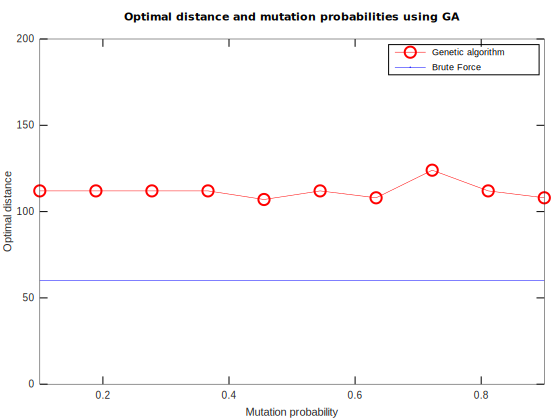

In [48]:
plot([OptimalityAndMutationProbability(:,1)], [OptimalityAndMutationProbability(:,2)], 'o-r');
title ("Optimal distance and mutation probabilities using GA");
xlabel ("Mutation probability");
ylabel ("Optimal distance");
hold on;
plot([min(OptimalityAndMutationProbability(:,1)),max(OptimalityAndMutationProbability(:,1))],[optimalDistance,optimalDistance], 'b')
xlim([min(OptimalityAndMutationProbability(:,1)) max(OptimalityAndMutationProbability(:,1))])
ylim([0 200])
legend('Genetic algorithm', 'Brute Force')
hold off;

### ii) Size of initial generation

In [49]:
function OptimalityAndSizeInitialGeneration = tableOptimalityAndSizeInitialGeneration(minSizeInitialGeneration,maxSizeInitialGeneration, nGenerations,sizeNextGenerations, d,pm)
    
    OptimalityAndSizeInitialGeneration = zeros(maxSizeInitialGeneration-minSizeInitialGeneration+1,2);
    
    count = 1;
    
    initialGeneration0 = createGeneration(totalPop = perms(1:6),sizeGen = maxSizeInitialGeneration);
    
    for i = minSizeInitialGeneration:maxSizeInitialGeneration;
    
        generations = GA(initialGeneration = initialGeneration0(1:i,:), nGenerations = nGenerations, sizeNextGenerations = sizeNextGenerations, d = d, pm = pm);
        
        OptimalityAndSizeInitialGeneration(count,1) = i;
        OptimalityAndSizeInitialGeneration(count,2) = generations{nGenerations+1}{5};
        count++;

    end

end

In [50]:
OptimalityAndSizeInitialGeneration = tableOptimalityAndSizeInitialGeneration(minSizeInitialGeneration = 5,maxSizeInitialGeneration = 20, nGenerations = 2,sizeNextGenerations = 10, d = d, pm = 0.5)

OptimalityAndSizeInitialGeneration =

     5   108
     6   160
     7   160
     8   125
     9   154
    10   154
    11   160
    12   144
    13   125
    14   160
    15   125
    16   108
    17    60
    18   108
    19    60
    20    60



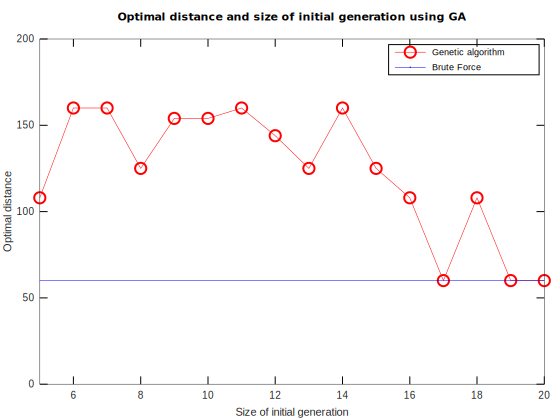

In [51]:
plot([OptimalityAndSizeInitialGeneration(:,1)], [OptimalityAndSizeInitialGeneration(:,2)], 'o-r');
title ("Optimal distance and size of initial generation using GA");
xlabel ("Size of initial generation");
ylabel ("Optimal distance");
hold on;
plot([min(OptimalityAndSizeInitialGeneration(:,1)),max(OptimalityAndSizeInitialGeneration(:,1))],[optimalDistance,optimalDistance], 'b')
xlim([min(OptimalityAndSizeInitialGeneration(:,1)) max(OptimalityAndSizeInitialGeneration(:,1))])
ylim([0 200])
legend('Genetic algorithm', 'Brute Force')
hold off;

### iii) Size of next generations

In [52]:
function OptimalityAndSizeNextGenerations = tableOptimalityAndSizeNextGenerations(minSizeNextGenerations,maxSizeNextGenerations, nGenerations,initialGeneration,d,pm)
    
    OptimalityAndGenerations = zeros(maxSizeNextGenerations-minSizeNextGenerations+1,2);
    
    count = 1;
    
    for i = minSizeNextGenerations:maxSizeNextGenerations;
    
        generations = GA(initialGeneration = initialGeneration, nGenerations = nGenerations, sizeNextGenerations = i, d = d, pm);
        
        OptimalityAndSizeNextGenerations(count,1) = i;
        OptimalityAndSizeNextGenerations(count,2) = generations{nGenerations+1}{5};
        count++;

    end

end

In [53]:
OptimalityAndSizeNextGenerations = tableOptimalityAndSizeNextGenerations(minSizeNextGenerations = 5,maxSizeNextGenerations = 30, nGenerations = 2,initialGeneration = generation0, d = d, pm = 0.5)

OptimalityAndSizeNextGenerations =

     5   145
     6   129
     7   112
     8   112
     9   112
    10   112
    11   112
    12   107
    13   112
    14   112
    15   112
    16   112
    17   112
    18   112
    19   107
    20   112
    21   112
    22   112
    23   107
    24   112
    25   112
    26   112
    27   107
    28   112
    29   107
    30   112



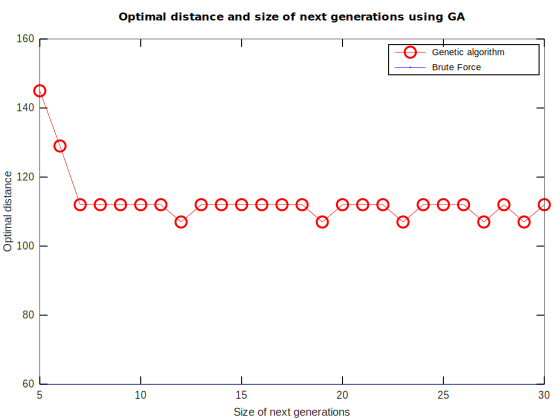

In [54]:
plot([OptimalityAndSizeNextGenerations(:,1)], [OptimalityAndSizeNextGenerations(:,2)], 'o-r');
title ("Optimal distance and size of next generations using GA");
xlabel ("Size of next generations");
ylabel ("Optimal distance");
hold on;
plot([min(OptimalityAndSizeNextGenerations(:,1)),max(OptimalityAndSizeNextGenerations(:,1))],[optimalDistance,optimalDistance], 'b')
xlim([min(OptimalityAndSizeNextGenerations(:,1)) max(OptimalityAndSizeNextGenerations(:,1))])
#ylim([0 200])
legend('Genetic algorithm', 'Brute Force')
hold off;

## Problema 3: Modifique el código para que la primera y la última ciudad visitada por vendedor viajero sean las mismas. Entregue output en la consola de Octave para demostrar que su código está implementado correctamente. Considere la misma matriz de distancias de la pregunta anterior

* De tarea para la casa